# Use Case 4: How Do Mutations Affect Protein Abundance

## Step 1: Import Packages 

We commence by importing the standard data science packages for dataframe manipulation and visualizations. We also import the cptac package for accessing the cancer data and accessory functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.utils as ut

en = cptac.Ucec()

## Step 2: Get Data and Find Your Gene of Interest

Start by grabbing the somatic gene mutation data via en.get_somatic_mutation(), which returns a pandas dataframe. Then, choose a gene of interest to observe how mutation affects protein abundance. This example uses the TTN gene, having the highest number of mutations within our cohort.

In [2]:
somatic_mutations = en.get_somatic_mutation('washu')
gene = somatic_mutations["Gene"].value_counts().index[0]

## Step 3: Joining dataframes

The relevant data for TTN lies in two different dataframes, one for proteomics and one for the mutations. To facilitate the analysis, use en.join_omics_to_mutations function to join mutation data with molecular proteomics measurements. Specify the molecular dataframe name ("proteomics"), gene names for the mutation and omics data, and an empty list for the mutations_filter parameter to filter multiple mutations down to just one.

In [3]:
omics_mutations = en.join_omics_to_mutations(
    omics_name="proteomics",
    omics_source='umich',
    mutations_genes=gene,
    mutations_source='washu',
    omics_genes=gene, 
    mutations_filter=[]
)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 115 samples for the TTN gene (C:\Users\sabme\anaconda3\lib\site-packages\cptac\cancers\cancer.py, line 377)


## Step 4: Plot data

The aim is to visually inspect the protein abundance changes for patients with a mutation compared to those with the normal gene sequence. Use the Seaborn package to create the figures.

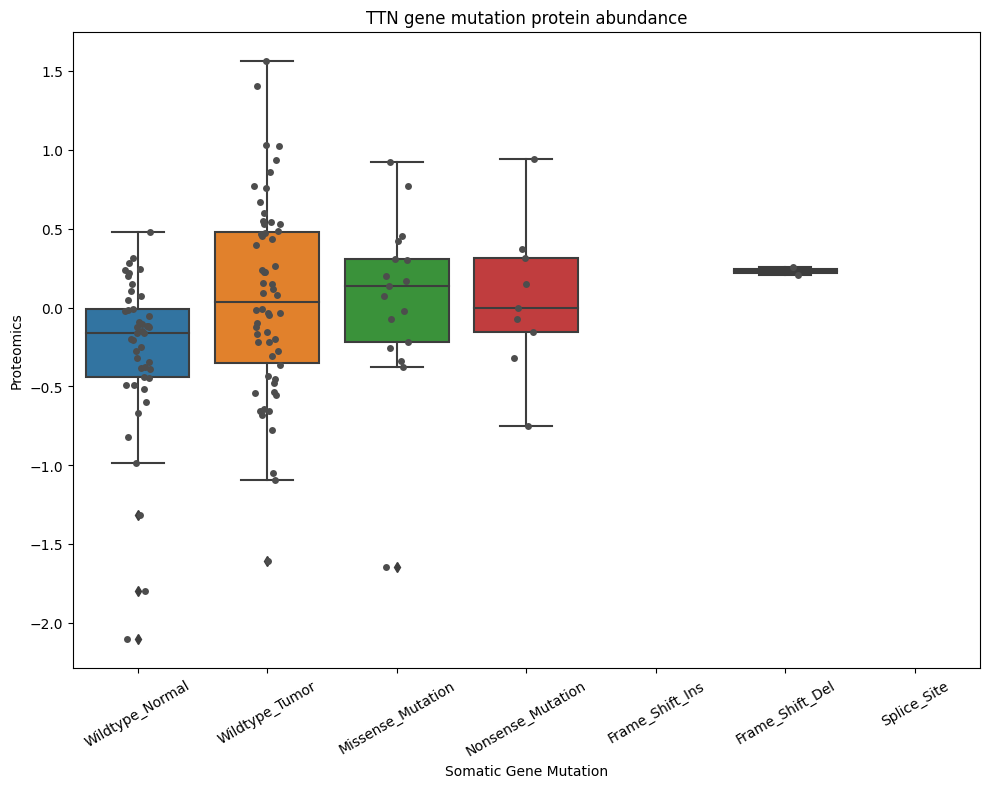

In [4]:
a4_dims = (11.7, 8.27) 
fig, ax = plt.subplots(figsize=a4_dims)

somatic_boxplot = sns.boxplot(
    data=omics_mutations, 
    x=gene + "_Mutation",
    y=gene + "_umich_proteomics", 
    ax=ax, 
    order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation", "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]
) 
somatic_boxplot = sns.stripplot(
    data=omics_mutations, 
    x=gene + "_Mutation",
    y=gene + "_umich_proteomics",
    jitter=True, 
    color=".3", 
    order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation", "Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]
)

somatic_boxplot.set_title("TTN gene mutation protein abundance")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) 
plt.show()

## Step 5: Try it again

Repeat the process with different genes. This time, we use the CTNNB1 gene, known as an oncogene and frequently mutated in our cohort.

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 120 samples for the CTNNB1 gene (C:\Users\sabme\anaconda3\lib\site-packages\cptac\cancers\cancer.py, line 377)


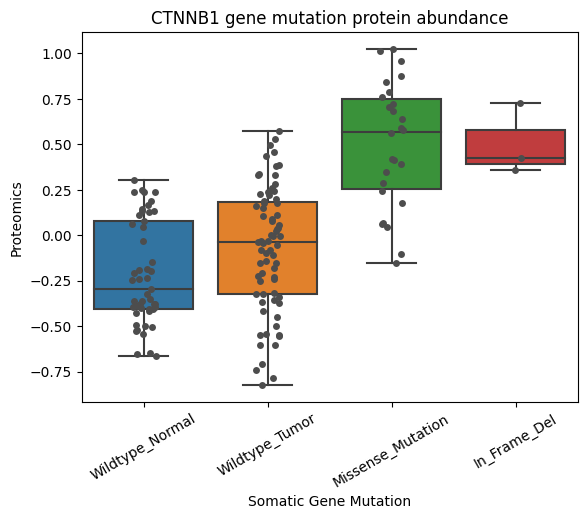

In [5]:
gene2 = 'CTNNB1'
omics_mutations2 = en.join_omics_to_mutations(
    omics_name="proteomics",
    omics_source='umich',
    mutations_genes=gene2,
    mutations_source='washu',
    omics_genes=gene2, 
    mutations_filter=[]
)

boxplot2 = sns.boxplot(
    data=omics_mutations2, 
    x=gene2 + "_Mutation",
    y=gene2 + "_umich_proteomics", 
    order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","In_Frame_Del"]
)
boxplot2.set_title("CTNNB1 gene mutation protein abundance")
boxplot2 = sns.stripplot(
    data=omics_mutations2, 
    x=gene2 + "_Mutation",
    y=gene2 + "_umich_proteomics",
    jitter=True, 
    color=".3", 
    order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","In_Frame_Del"]
)
boxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
boxplot2.set_xticklabels(boxplot2.get_xticklabels(),rotation=30)
plt.show()

## Step 6: Repeat with Ovarian data

The same process can be repeated for other datasets, like the Ovarian dataset. The function calls are consistent across different cancer types.

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 26 samples for the TP53 gene (C:\Users\sabme\anaconda3\lib\site-packages\cptac\cancers\cancer.py, line 377)


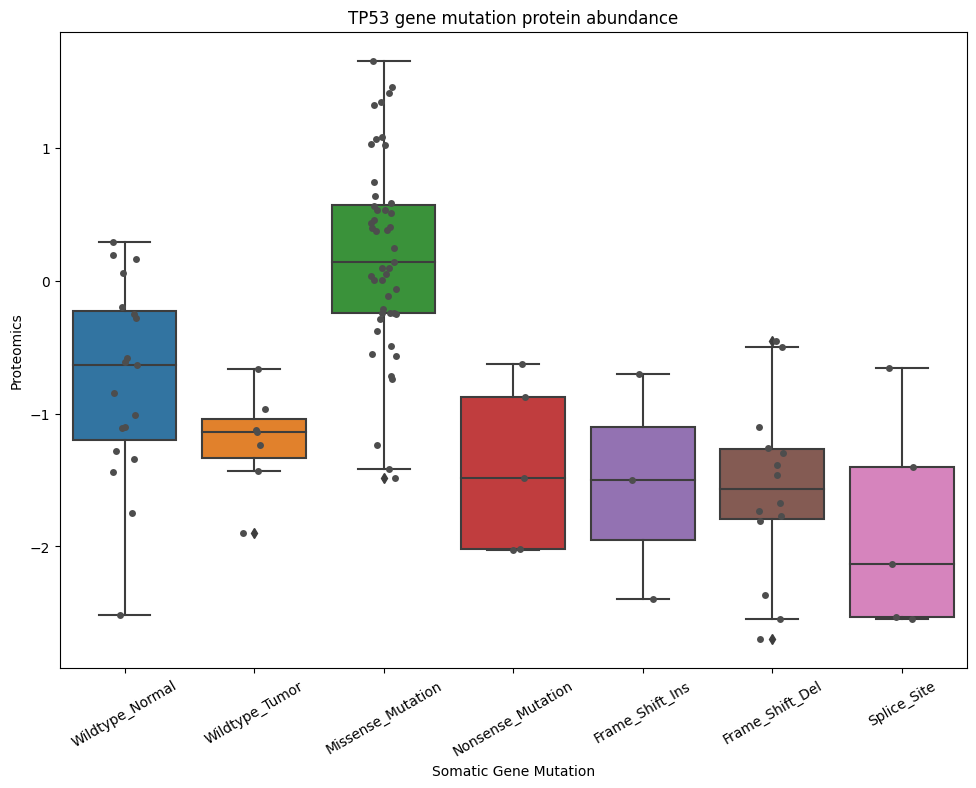

In [6]:
ov = cptac.Ov()

source1 = 'umich'
source2 = 'washu'
somatic_mutations = ov.get_somatic_mutation(source2)

gene = "TP53"
ovarian_omics_mutations = ov.join_omics_to_mutations(
    omics_name="proteomics",
    omics_source=source1,
    mutations_genes=gene,
    mutations_source=source2,
    omics_genes=gene, 
    mutations_filter=[]
)

plt.figure(figsize=(11.7, 8.27))

boxplot = sns.boxplot(
    data=ovarian_omics_mutations, 
    x=gene + "_Mutation", 
    y=gene + "_" + source1 + "_proteomics", 
    order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation", "Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]
)
boxplot.set_title("TP53 gene mutation protein abundance")
boxplot = sns.stripplot(
    data=ovarian_omics_mutations, 
    x=gene + "_Mutation", 
    y=gene + "_" + source1 + "_proteomics",
    jitter=True, 
    color=".3",
    order=["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation", "Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]
)
boxplot.set(xlabel="Somatic Gene Mutation", ylabel="Proteomics")
boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=30)
plt.show()

Note that 'cptac' warnings inform about samples that lack mutations. These are filled with Wildtype_Tumor or Wildtype_Normal as per the default settings in the join_omics_to_mutations function.